In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Traveler Trip Dataset Description

kaggle link: https://www.kaggle.com/datasets/rkiattisak/traveler-trip-data

About Dataset
The travel dataset provides detailed information on various trips taken by travelers, including their destination, travel dates, duration of the trip in days, traveler demographics (name, age, gender, and nationality), as well as the type and cost of accommodation and transportation. This dataset can be used to gain insights into travel patterns, preferences, and behaviors of different types of travelers. It can also be helpful for travel-related businesses, such as travel agencies, to create tailored marketing strategies and travel packages that meet the needs and preferences of different travelers.

Column details:

• Trip ID: A unique identifier for each trip taken by a traveler.

• Destination: The name of the city or country visited by the traveler.

• Start date: The date the traveler started the trip.

• End date: The date the traveler ended the trip.

• Duration (days): The number of days the traveler spent on the trip.

• Traveler name: The name of the traveler.

• Traveler age: The age of the traveler at the time of the trip.

• Traveler gender: The gender of the traveler.

• Traveler nationality: The nationality of the traveler.

• Accommodation type: The type of accommodation the traveler stayed in, such as hotel, hostel, or Airbnb.

• Accommodation cost: The cost of the accommodation for the entire trip.

• Transportation type: The mode of transportation used by the traveler, such as plane, train, or car.

• Transportation cost: The cost of transportation for the entire trip.

** The purpose of creating this dataset is solely for educational use, and any commercial use is strictly prohibited
and this dataset was large language models generated and not collected from actual data sources.

In [3]:
traveler_data  = pd.read_csv('traveler_trip_cleaned.csv')
traveler_data.head(5)

,Unnamed: 0,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost,dest_city
0,0,1,"London, UK",2023-05-01,2023-05-08,7,John Smith,35,Male,American,Hotel,1200.0,Plane,600.0,London
1,1,2,"Phuket, Thailand",2023-06-15,2023-06-20,5,Jane Doe,28,Female,Canadian,Resort,800.0,Plane,500.0,Phuket
2,2,3,"Bali, Indonesia",2023-07-01,2023-07-08,7,David Lee,45,Male,South Korean,Villa,1000.0,Plane,700.0,Bali
3,3,4,"New York, USA",2023-08-15,2023-08-29,14,Sarah Johnson,29,Female,British,Hotel,2000.0,Plane,1000.0,New York
4,4,5,"Tokyo, Japan",2023-09-10,2023-09-17,7,Kim Nguyen,26,Female,Vietnamese,Airbnb,700.0,Train,200.0,Tokyo


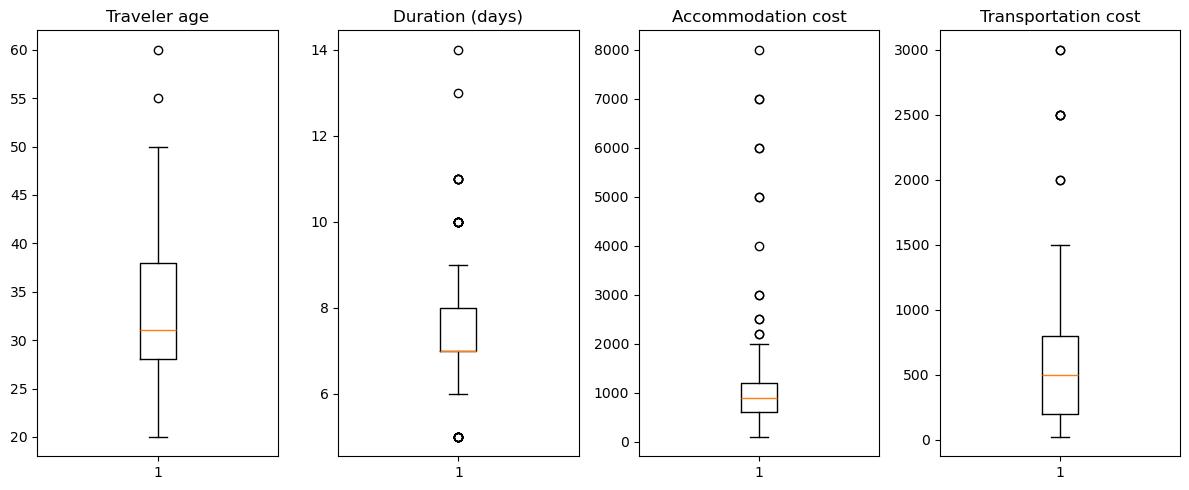

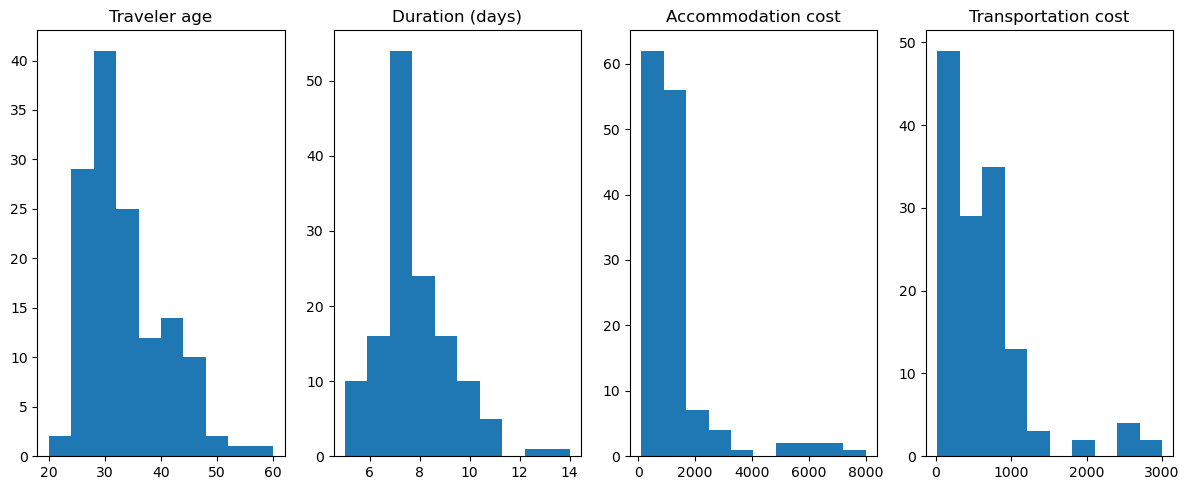

In [5]:
## Check Data Distribution With Box Plot and Historgram

numerical_cols = ['Traveler age','Duration (days)','Accommodation cost', 'Transportation cost']

fig, ax = plt.subplots(1, len(numerical_cols), figsize=(12,5))

for i in range(0,len(numerical_cols)):
    ax[i].boxplot(traveler_data[numerical_cols[i]])
    ax[i].set_title(numerical_cols[i])
    plt.tight_layout()

fig, ax = plt.subplots(1, len(numerical_cols), figsize=(12,5))

for i in range(0,len(numerical_cols)):
    ax[i].hist(traveler_data[numerical_cols[i]])
    ax[i].set_title(numerical_cols[i])
    plt.tight_layout()

plt.show()

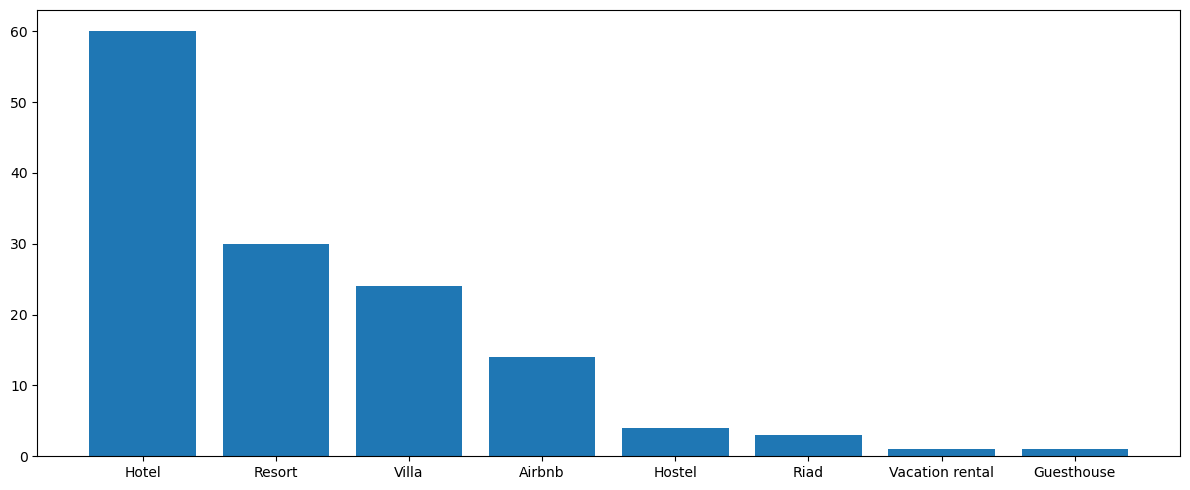

In [115]:
# Bar Chart Traveler's Profile

fig, axs = plt.subplots(figsize=(12,5)) 

axs.bar(traveler_data['Accommodation type'].unique(),traveler_data['Accommodation type'].value_counts().values)

plt.tight_layout()
plt.show()




In [81]:
traveler_data['Accommodation type'].value_counts().values

array([60, 30, 24, 14,  4,  3,  1,  1])

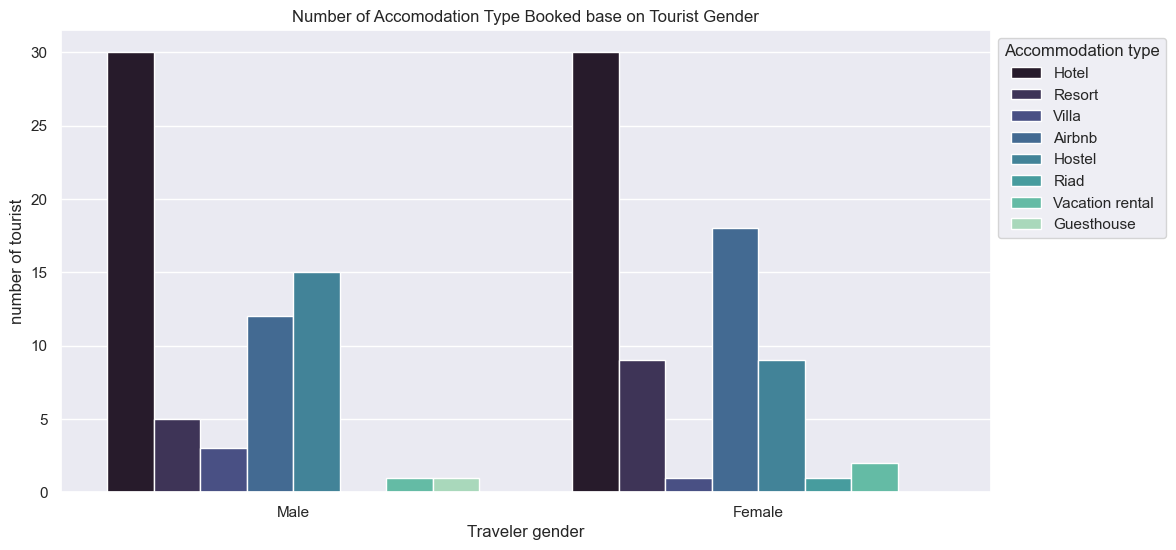

In [513]:
fig = plt.figure(figsize=(12,6))

sns.set_theme()
ctplot = sns.countplot(traveler_data, x='Traveler gender', hue='Accommodation type', palette='mako', legend=True)
sns.move_legend(ctplot, "upper left", bbox_to_anchor=(1,1))

plt.ylabel("number of tourist")
plt.title("Number of Accomodation Type Booked base on Tourist Gender")
plt.show()

In [665]:
traveler_data[['Traveler gender', 'Accommodation type']].groupby(['Accommodation type','Traveler gender']).agg(Count=("Accommodation type", "count"))


Count
Accommodation type Traveler gender       
Airbnb             Female              18
                   Male                12
Guesthouse         Male                 1
Hostel             Female               9
                   Male                15
Hotel              Female              30
                   Male                30
Resort             Female               9
                   Male                 5
Riad               Female               1
Vacation rental    Female               2
                   Male                 1
Villa              Female               1
                   Male                 3

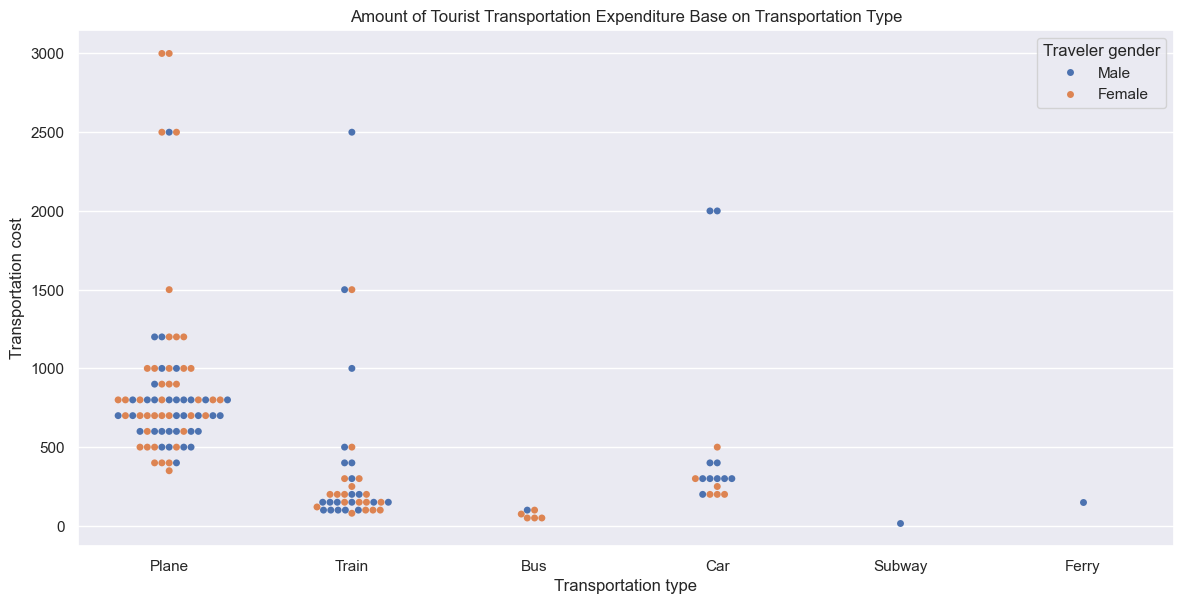

In [523]:
fig = plt.figure(figsize=(12,6))

sns.set_theme()
ctplot = sns.swarmplot(traveler_data, x='Transportation type', y='Transportation cost',hue='Traveler gender', legend=True)


# for p in ctplot.patches:
#     txt = str(p.get_height())
#     txt_x = p.get_x() 
#     txt_y = p.get_height()
#     ctplot.text(txt_x,txt_y,txt)

plt.tight_layout()
plt.title("Amount of Tourist Transportation Expenditure Base on Transportation Type")
plt.show()

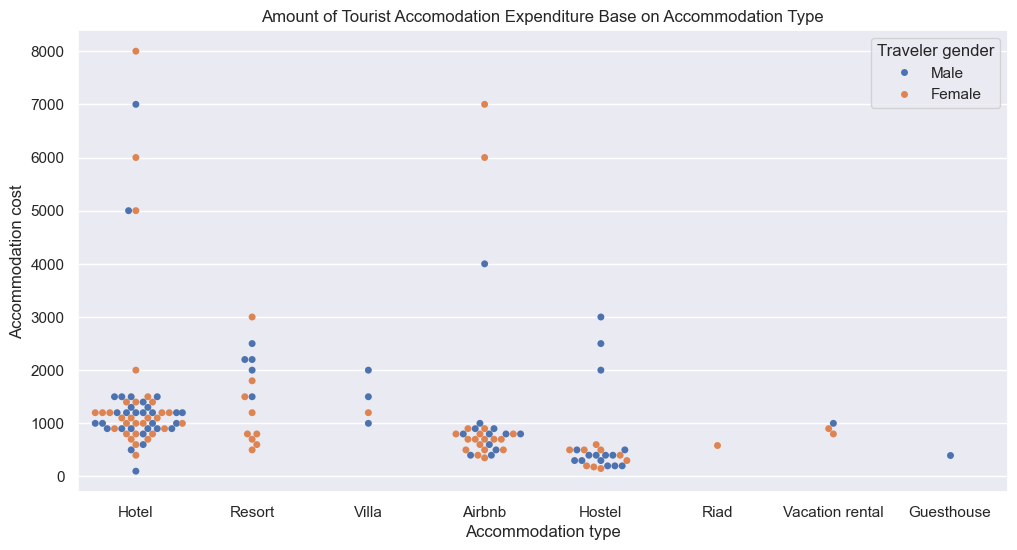

In [525]:
fig = plt.figure(figsize=(12,6))

sns.set_theme()
ctplot = sns.swarmplot(traveler_data, x='Accommodation type', y='Accommodation cost',hue='Traveler gender', legend=True)


# for p in ctplot.patches:
#     txt = str(p.get_height())
#     txt_x = p.get_x() 
#     txt_y = p.get_height()
#     ctplot.text(txt_x,txt_y,txt)

plt.title("Amount of Tourist Accomodation Expenditure Base on Accommodation Type")
plt.show()

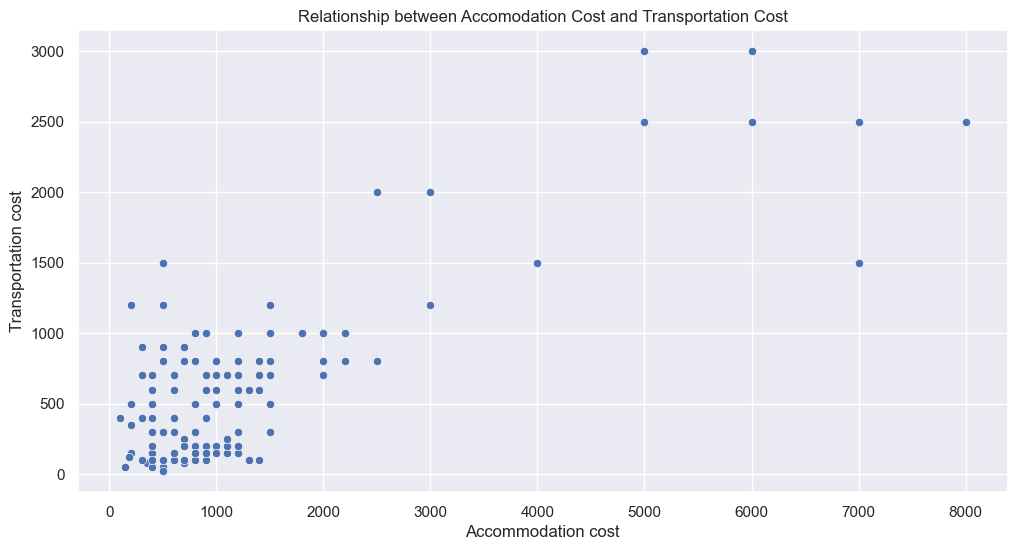

In [529]:
fig = plt.figure(figsize=(12,6))

sns.set_theme()
ctplot = sns.scatterplot(traveler_data, x='Accommodation cost', y='Transportation cost', legend=True)


# for p in ctplot.patches:
#     txt = str(p.get_height())
#     txt_x = p.get_x() 
#     txt_y = p.get_height()
#     ctplot.text(txt_x,txt_y,txt)

plt.title("Relationship between Accomodation Cost and Transportation Cost")
plt.show()

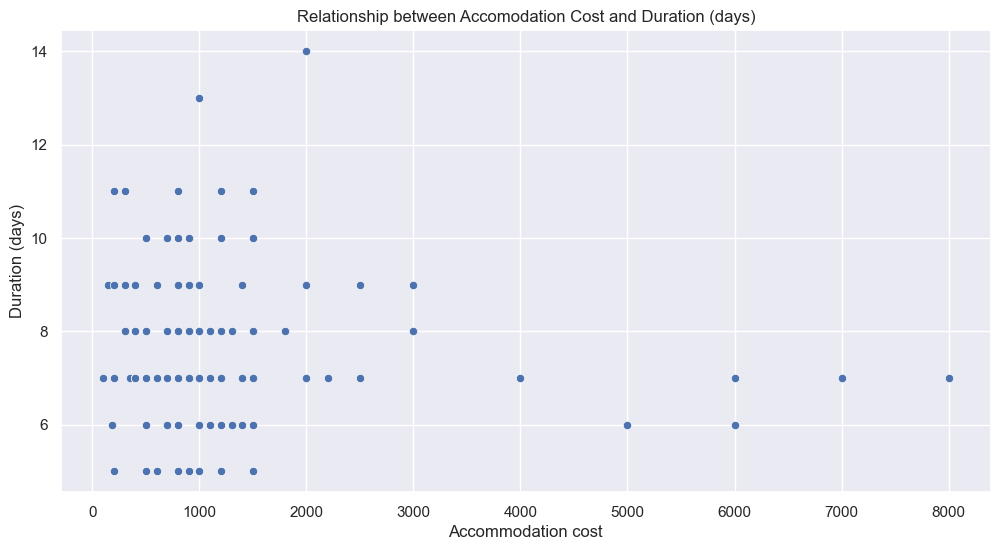

In [531]:
fig = plt.figure(figsize=(12,6))

sns.set_theme()
ctplot = sns.scatterplot(traveler_data, x='Accommodation cost', y='Duration (days)', legend=True)

# for p in ctplot.patches:
#     txt = str(p.get_height())
#     txt_x = p.get_x() 
#     txt_y = p.get_height()
#     ctplot.text(txt_x,txt_y,txt)

plt.title("Relationship between Accomodation Cost and Duration (days)")
plt.show()

In [685]:
# Uji Korelasi Pearson

test_pearson = np.corrcoef(traveler_data['Accommodation cost'],traveler_data['Transportation cost'])
print(test_pearson)


[[1.         0.78732028]
 [0.78732028 1.        ]]


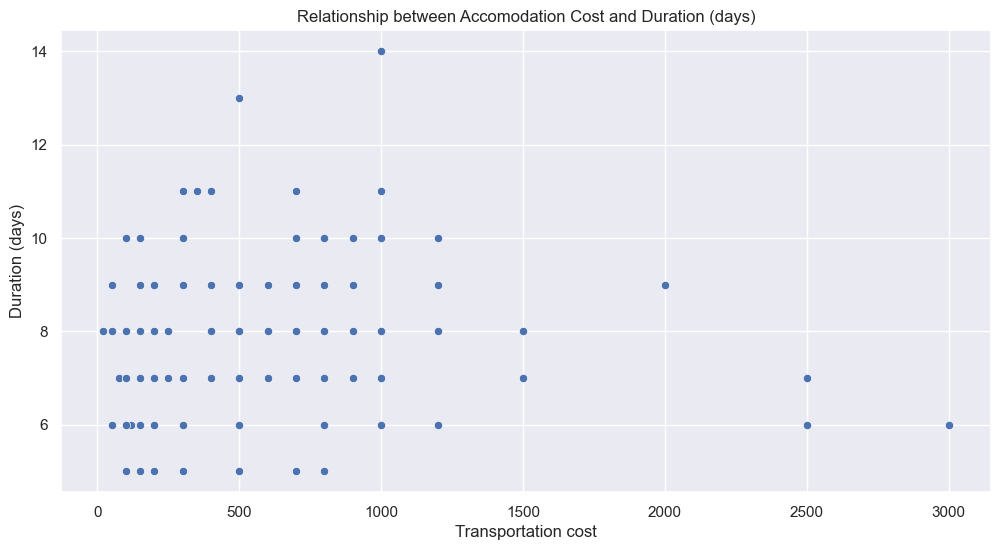

In [533]:
fig = plt.figure(figsize=(12,6))

sns.set_theme()
ctplot = sns.scatterplot(traveler_data, x='Transportation cost', y='Duration (days)', legend=True)

# for p in ctplot.patches:
#     txt = str(p.get_height())
#     txt_x = p.get_x() 
#     txt_y = p.get_height()
#     ctplot.text(txt_x,txt_y,txt)

plt.title("Relationship between Accomodation Cost and Duration (days)")
plt.show()

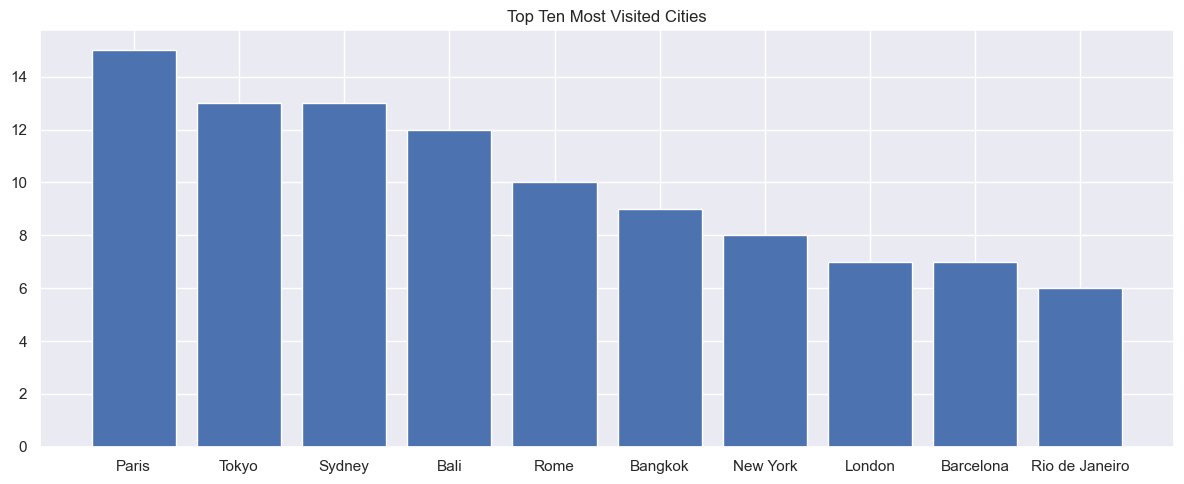

In [535]:
# Bar Chart Traveler's Profile

fig, axs = plt.subplots(figsize=(12,5)) 

axs.bar(traveler_data['dest_city'].value_counts().nlargest(10).index,
        traveler_data['dest_city'].value_counts().nlargest(10).values)

plt.title("Top Ten Most Visited Cities")
plt.tight_layout()
plt.show()


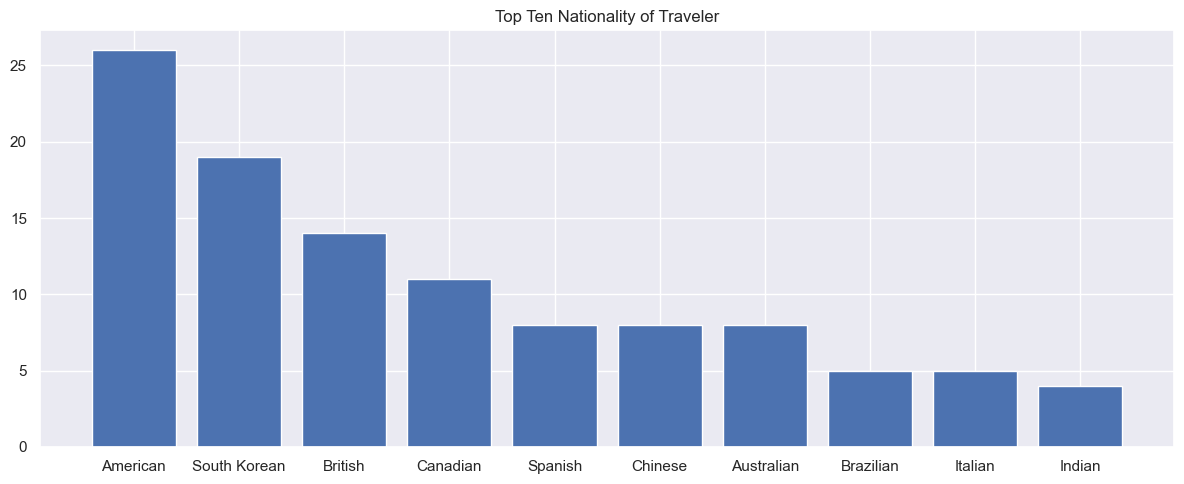

In [539]:
# Bar Chart Traveler's Profile

fig, axs = plt.subplots(figsize=(12,5)) 

axs.bar(traveler_data['Traveler nationality'].value_counts().nlargest(10).index,
        traveler_data['Traveler nationality'].value_counts().nlargest(10).values
       )

plt.title("Top Ten Nationality of Traveler")
plt.tight_layout()
plt.show()


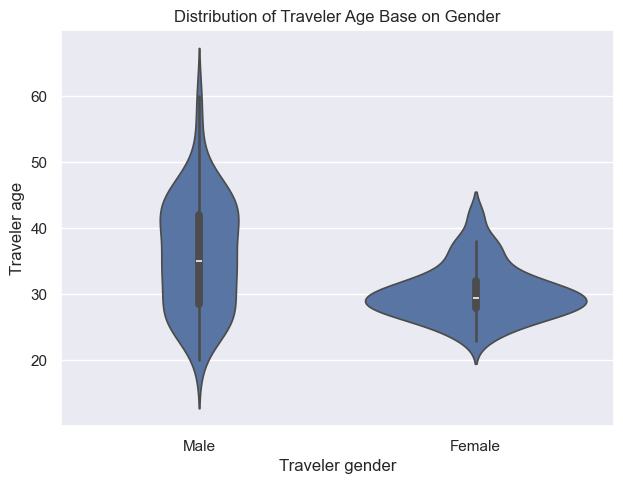

In [543]:
sns.violinplot(data=traveler_data, x="Traveler gender", y="Traveler age")
plt.tight_layout()
plt.title("Distribution of Traveler Age Base on Gender")
plt.show()

In [424]:
visitor_per_years = pd.DataFrame(pd.DatetimeIndex(traveler_data['Start date']).year.value_counts())
# traveler_data['year_travel']= pd.DatetimeIndex(traveler_data['Start date']).year

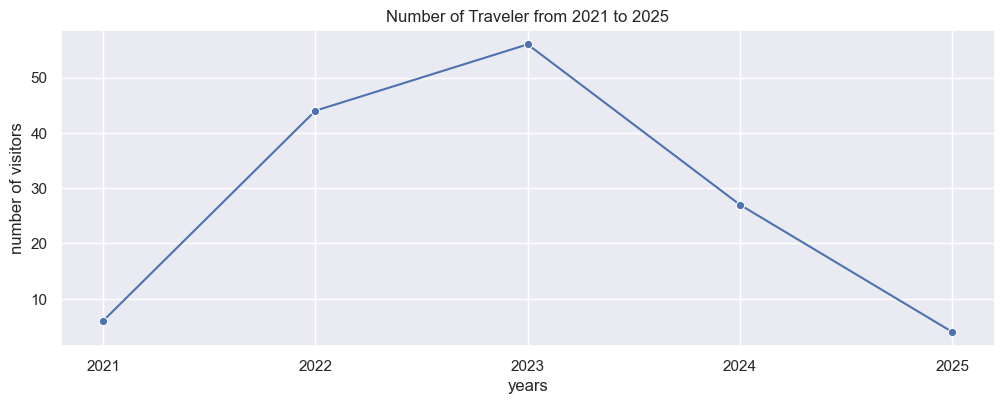

In [551]:
fig,ax = plt.subplots(figsize=(10,4))
sns.lineplot(visitor_per_years, x=visitor_per_years['count'].index.astype(int), y=visitor_per_years['count'].values,
            marker='o')

ax.set_xticks(np.arange(2021, 2026, 1))
plt.tight_layout()
plt.ylabel("number of visitors")
plt.xlabel("years")
plt.title("Number of Traveler from 2021 to 2025")
plt.show()

In [372]:
traveler_data

,Unnamed: 0,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost,dest_city,year_travel
0,0,1,"London, UK",2023-05-01,2023-05-08,7,John Smith,35,Male,American,Hotel,1200.0,Plane,600.0,London,2023
1,1,2,"Phuket, Thailand",2023-06-15,2023-06-20,5,Jane Doe,28,Female,Canadian,Resort,800.0,Plane,500.0,Phuket,2023
2,2,3,"Bali, Indonesia",2023-07-01,2023-07-08,7,David Lee,45,Male,South Korean,Villa,1000.0,Plane,700.0,Bali,2023
3,3,4,"New York, USA",2023-08-15,2023-08-29,14,Sarah Johnson,29,Female,British,Hotel,2000.0,Plane,1000.0,New York,2023
4,4,5,"Tokyo, Japan",2023-09-10,2023-09-17,7,Kim Nguyen,26,Female,Vietnamese,Airbnb,700.0,Train,200.0,Tokyo,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,134,135,"Rio de Janeiro, Brazil",2023-08-01,2023-08-10,9,Jose Perez,37,Male,Brazilian,Hostel,2500.0,Car,2000.0,Rio de Janeiro,2023
133,135,136,"Vancouver, Canada",2023-08-15,2023-08-21,6,Emma Wilson,29,Female,Canadian,Hotel,5000.0,Plane,3000.0,Vancouver,2023
134,136,137,"Bangkok, Thailand",2023-09-01,2023-09-08,7,Ryan Chen,34,Male,Chinese,Hostel,2000.0,Train,1000.0,Bangkok,2023
135,137,138,"Barcelona, Spain",2023-09-15,2023-09-22,7,Sofia Rodriguez,25,Female,Spanish,Airbnb,6000.0,Plane,2500.0,Barcelona,2023


<Axes: xlabel='Transportation type', ylabel='count'>

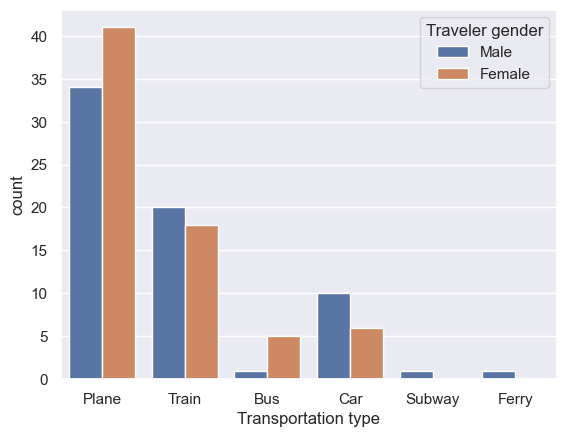

In [497]:
sns.countplot(traveler_data, x="Transportation type", hue="Traveler gender")

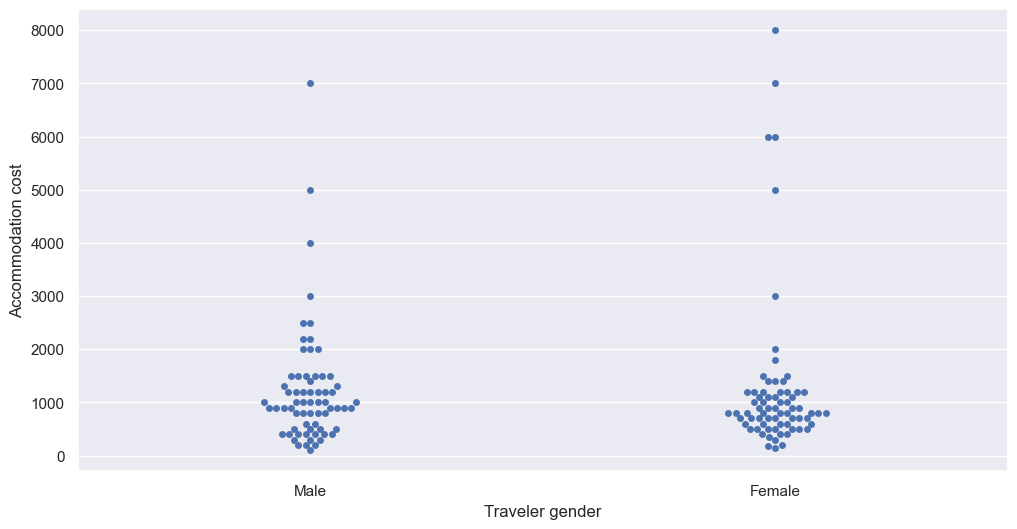

In [503]:
fig = plt.figure(figsize=(12,6))

sns.set_theme()
ctplot = sns.swarmplot(traveler_data, x='Traveler gender', y='Accommodation cost', legend=True)


# for p in ctplot.patches:
#     txt = str(p.get_height())
#     txt_x = p.get_x() 
#     txt_y = p.get_height()
#     ctplot.text(txt_x,txt_y,txt)

plt.show()

In [611]:
total['Traveler total cost']

dest_city
Amsterdam          3950.0
Athens             2600.0
Auckland           9500.0
Bali              24000.0
Bangkok            7950.0
Barcelona         15700.0
Berlin             2100.0
Cairo               800.0
Cancun             9000.0
Cape Town          8700.0
Dubai              6900.0
Edinburgh          1050.0
Honolulu           7000.0
London             8400.0
Los Angeles        1500.0
Marrakech          1000.0
New York          13600.0
New York City     12500.0
Paris             29400.0
Phnom Penh          700.0
Phuket             5500.0
Rio de Janeiro    10350.0
Rome              14180.0
Santorini          1150.0
Seoul              1470.0
Sydney            27850.0
Tokyo             22900.0
Vancouver          8975.0
Name: Traveler total cost, dtype: float64

In [601]:
traveler_data['Traveler total cost'] = traveler_data['Accommodation cost'] + traveler_data['Transportation cost']
total = traveler_data[['Traveler total cost','dest_city']].groupby('dest_city').sum()

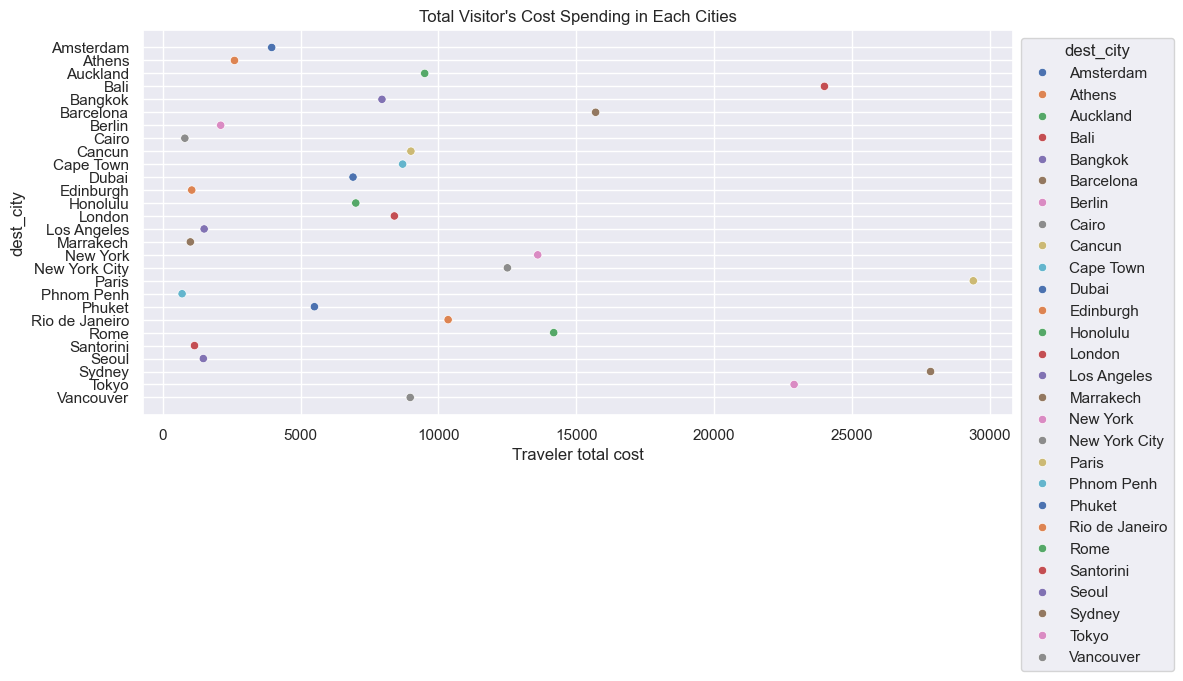

In [641]:
fig = plt.figure(figsize=(12,6))

sns.set_theme()
ctplot = sns.scatterplot(total, y=total.index, x=total['Traveler total cost'],hue=total.index, legend=True, palette='deep')
sns.move_legend(ctplot, "upper left", bbox_to_anchor=(1,1))



plt.tight_layout()
plt.title("Total Visitor's Cost Spending in Each Cities")
plt.show()

In [683]:
traveler_data[traveler_data['Accommodation type'] == 'Resort'].describe()

,Unnamed: 0,Trip ID,Duration (days),Traveler age,Accommodation cost,Transportation cost,year_travel,Traveler total cost
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,52.642857,53.642857,7.714286,33.785714,1521.428571,821.428571,2023.214286,2342.857143
std,34.179632,34.179632,1.489893,6.387230,788.551322,215.472902,1.121714,934.562247
min,1.000000,2.000000,5.000000,25.000000,500.000000,500.000000,2021.000000,1300.000000
25%,19.000000,20.000000,7.000000,28.250000,800.000000,700.000000,2023.000000,1350.000000
50%,67.500000,68.500000,7.000000,33.000000,1500.000000,800.000000,2023.000000,2450.000000
75%,76.250000,77.250000,8.000000,38.500000,2150.000000,950.000000,2024.000000,2950.000000
max,108.000000,109.000000,11.000000,45.000000,3000.000000,1200.000000,2025.000000,4200.000000
